<a href="https://colab.research.google.com/github/khaylheb99/Caleb/blob/main/Fifa_23_sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import tweepy
import datetime
import textblob
import wordcloud
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('C:\\Users\\PC\\Documents\\Datasets\\fifa23_steam_reviews.csv')
df.head()

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
0,134539477,english,Mantap,2023-03-12 14:34:26,True,0,0,True,False,False,9,1,7255,1662,7255,2023-03-12 14:34:13
1,134538118,english,yum,2023-03-12 14:10:47,True,0,0,True,False,False,18,8,3842,481,3811,2023-03-12 14:40:53
2,134538086,english,i hate all the sweats who never touch grass\n,2023-03-12 14:10:04,True,0,0,True,False,False,6,1,16462,3041,16462,2023-03-12 13:38:03
3,134537160,english,Fxxk u EAAntiCheat! Fxxk u EA!,2023-03-12 13:53:26,False,0,0,True,False,False,282,11,4652,13,4652,2023-03-12 13:50:21
4,134536841,english,fifa is the best,2023-03-12 13:47:39,True,0,0,True,False,False,1,1,9552,261,9544,2023-03-12 13:57:39


In [ ]:
df.shape

(25737, 16)

In [ ]:
df.info

<bound method DataFrame.info of               id language                                             review  \
0      134539477  english                                             Mantap   
1      134538118  english                                                yum   
2      134538086  english      i hate all the sweats who never touch grass\n   
3      134537160  english                     Fxxk u EAAntiCheat! Fxxk u EA!   
4      134536841  english                                   fifa is the best   
...          ...      ...                                                ...   
25732  123013084  english  i dont understand why it use my cpu 80-90% dur...   
25733  123013080  english                                 Hit ball with Fut.   
25734  123013051  english       Finally after updates the game is very nice.   
25735  123013019  english                                                 ..   
25736  123013015  english  As a returning player from FIfa 13 this looks ...   

       

In [ ]:
df.review.isna().sum()

86

In [ ]:
Rev = df['review']
Rev = pd.DataFrame(Rev)

In [ ]:
Rev

,review
0,Mantap
1,yum
2,i hate all the sweats who never touch grass\n
3,Fxxk u EAAntiCheat! Fxxk u EA!
4,fifa is the best
...,...
25732,i dont understand why it use my cpu 80-90% dur...
25733,Hit ball with Fut.
25734,Finally after updates the game is very nice.
25735,..


In [ ]:
Vote = df['voted_up']
Vote =  pd.DataFrame(Vote)
Vote

,voted_up
0,True
1,True
2,True
3,False
4,True
...,...
25732,False
25733,True
25734,True
25735,True


In [ ]:
Rev_votes = Rev.merge(Vote, how = 'right', left_index=True,right_index=True)
Rev_votes.head()

,review,voted_up
0,Mantap,True
1,yum,True
2,i hate all the sweats who never touch grass\n,True
3,Fxxk u EAAntiCheat! Fxxk u EA!,False
4,fifa is the best,True


In [ ]:
Rev_votes.tail()

,review,voted_up
25732,i dont understand why it use my cpu 80-90% dur...,False
25733,Hit ball with Fut.,True
25734,Finally after updates the game is very nice.,True
25735,..,True
25736,As a returning player from FIfa 13 this looks ...,False


In [ ]:
Rev_votes.isna().sum()

review      86
voted_up     0
dtype: int64

In [ ]:
Rev_votes.drop_duplicates(subset="review",
                     keep=False, inplace=True)

In [ ]:
Rev_votes.shape

(19587, 2)

In [ ]:
Rev_votes.head()

,index,review,voted_up
0,0,hate sweats touch grass,True
1,1,fxxk u eaanticheat fxxk u ea,False
2,2,fifa best,True
3,3,game terrible worse terrible interface remembe...,False
4,4,droga,True


In [ ]:
Rev_votes.reset_index(inplace = True)

In [ ]:
Rev_votes.drop(columns = {'index'}, inplace = True)
Rev_votes.head()

,review,voted_up
0,hate sweats touch grass,True
1,fxxk u eaanticheat fxxk u ea,False
2,fifa best,True
3,game terrible worse terrible interface remembe...,False
4,droga,True


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
import spacy
#loading the english language small model of spacy

en = spacy.load('en_core_web_md')
sw_spacy = en.Defaults.stop_words


In [ ]:
import contractions

In [ ]:
def cleantext(text):
    text=re.sub(r'@["A-Za-z0-9"]+', '', text) #removing @mentions
    text=re.sub(r'#', '', text) #removing hashtags
    text=re.sub(r'RT[\s]+', '', text) #removing RTs
    text=re.sub(r'https?:/\/\/S+', '', text) #removing hyperlinks
    text=re.sub(r"\s\s+",'', text)
    return text

In [ ]:
def rem_en(input_txt):
    words = input_txt.lower().split()
    noise_free_words = [word for word in words if word not in stopwords] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [ ]:
def spacy_rem_en(input_txt):
    words = input_txt.lower().split()
    word_= [word for word in words if word[0].isalpha()]
    noise_free_word = [word for word in word_ if word.lower() not in sw_spacy]
    noise_free_texts = " ".join(noise_free_word) 
    return noise_free_texts

In [ ]:
def clean(text):
    #UNCT_TO_REMOVE = string.punctuation
    #ns = text.translate(str.maketrans(", ", PUNCT_TO_REMOVE))
    ans = ''.join([i for i in text if not i.isdigit()])
    ans = ''.join(text.split())
    #ns = re.sub(r'(!|.|?|/|\)1+', '', text)
    ans = re.sub(r'[^A-Za-z0-9 ]+', '',text)
    contractions.fix(text)
    return ans

In [ ]:
def hypertext(txt):
    hyperlink_removal = re.sub(r"http\S+", "", txt)
    return hyperlink_removal

In [ ]:
Rev_votes['review']=Rev_votes['review'].apply(lambda x: spacy_rem_en(x))
Rev_votes['review']=Rev_votes['review'].apply(lambda x: rem_en(x))
Rev_votes['review']=Rev_votes['review'].apply(lambda x: cleantext(x))
Rev_votes['review']=Rev_votes['review'].apply(lambda x: clean(x))
Rev_votes['review']=Rev_votes['review'].apply(lambda x: hypertext(x))

In [ ]:
Rev_votes.head(15)

,index,review,voted_up
0,0,hate sweats touch grass,True
1,1,fxxk u eaanticheat fxxk u ea,False
2,2,fifa best,True
3,3,game terrible worse terrible interface remembe...,False
4,4,droga,True
5,5,want play career start new load existing one f...,False
6,6,system trash able enter game point discuss gam...,False
7,7,progress saved resets restart,False
8,8,game opened pc,False
9,9,dont play game pls save,False


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm, notebook
from wordcloud import WordCloud

In [ ]:
def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords=None,
                min_font_size = 10).generate(text) 
             
    plt.figure(figsize = (4, 4), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

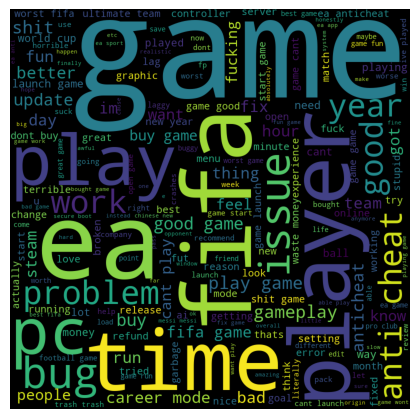

In [ ]:
texts = ''
for index, item in Rev_votes.iterrows():
    texts = texts + ' ' + item['review']
    
plot_word_cloud(texts)

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
Result = {}
for i, row in tqdm(Rev_votes.iterrows(), total = len(Rev_votes)):
    try:
        user_review = row['review']
        review_id = row['index']
        Result[review_id] = sia.polarity_scores(user_review)
    except:
        pass

100%|██████████████████████████████████████████████████████████████████████████| 19587/19587 [00:06<00:00, 2936.55it/s]


In [ ]:
Result

{0: {'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'compound': -0.5719},
 1: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 2: {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369},
 3: {'neg': 0.392, 'neu': 0.506, 'pos': 0.101, 'compound': -0.7845},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.7184},
 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 7: {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.6808},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.385, 'neu': 0.236, 'pos': 0.378, 'compound': 0.2363},
 10: {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.4939},
 11: {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.3612},
 12: {'neg': 0.152, 'neu': 0.435, 'pos': 0.413, 'compound': 0.5267},
 13: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.0, 'neu': 0.22, 'pos': 0.78,

In [ ]:
Result_sent = pd.DataFrame(Result).T

In [ ]:
Result_sent.head()

,neg,neu,pos,compound
0,0.552,0.448,0.000,-0.5719
1,0.000,1.000,0.000,0.0000
2,0.000,0.192,0.808,0.6369
3,0.392,0.506,0.101,-0.7845
4,0.000,1.000,0.000,0.0000


In [ ]:
pd.set_option('display.max_row', 100)

In [ ]:
Res_sentiment =  Rev_votes.merge(Result_sent, how = 'right', left_index=True,right_index=True)
Res_sentiment.head()

,index,review,voted_up,neg,neu,pos,compound
0,0,hate sweats touch grass,True,0.552,0.448,0.000,-0.5719
1,1,fxxk u eaanticheat fxxk u ea,False,0.000,1.000,0.000,0.0000
2,2,fifa best,True,0.000,0.192,0.808,0.6369
3,3,game terrible worse terrible interface remembe...,False,0.392,0.506,0.101,-0.7845
4,4,droga,True,0.000,1.000,0.000,0.0000


In [ ]:
Res_sentiment.drop(columns = {'index'}, inplace = True)
Res_sentiment.tail(15)

,review,voted_up,neg,neu,pos,compound
19572,anti chat anti cheat ah game taaaiiii fuck ea ...,False,0.255,0.506,0.240,0.2883
19573,horrible ac system fifa good game,True,0.337,0.385,0.279,-0.1531
19574,ea anticheat failed always baad,False,0.452,0.548,0.000,-0.5106
19575,unable play,False,0.000,0.294,0.706,0.3400
19576,great game heard lot updates whats new fifa ye...,True,0.000,0.687,0.313,0.6249
19577,players touch like lukakus,True,0.000,0.545,0.455,0.3612
19578,game incredible gen graphic,True,0.000,1.000,0.000,0.0000
19579,unable play modes,False,0.000,0.455,0.545,0.3400
19580,fifa ive played fifa ps4 ive alot memories goo...,True,0.159,0.536,0.305,0.8316
19581,ea anticheat service encountered error restart...,False,0.196,0.580,0.225,0.1027


In [ ]:
Res_sentiment.drop(columns = {'neg','neu','pos'}, inplace = True)
Res_sentiment.tail(15)

,review,voted_up,compound
19572,anti chat anti cheat ah game taaaiiii fuck ea ...,False,0.2883
19573,horrible ac system fifa good game,True,-0.1531
19574,ea anticheat failed always baad,False,-0.5106
19575,unable play,False,0.3400
19576,great game heard lot updates whats new fifa ye...,True,0.6249
19577,players touch like lukakus,True,0.3612
19578,game incredible gen graphic,True,0.0000
19579,unable play modes,False,0.3400
19580,fifa ive played fifa ps4 ive alot memories goo...,True,0.8316
19581,ea anticheat service encountered error restart...,False,0.1027


In [ ]:
label = []
for row in Res_sentiment['voted_up']:
    if row == True :   
        label.append(0)
    else:      
        label.append(1)

In [ ]:
Res_sentiment['label'] = label
Res_sentiment.head()

,review,voted_up,compound,label
0,hate sweats touch grass,True,-0.5719,0
1,fxxk u eaanticheat fxxk u ea,False,0.0000,1
2,fifa best,True,0.6369,0
3,game terrible worse terrible interface remembe...,False,-0.7845,1
4,droga,True,0.0000,0


In [ ]:
Res_sentiment.to_csv('C:\\Users\\PC\\Documents\\Datasets\\Fifa_23_sentiments.csv')

In [ ]:
import nltk
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words("english"))

# Tokenize the tweets into words
tweets = Res_sentiment["review"]
tokens = []
for tweet in tweets:
    words = word_tokenize(tweet)
    tokens.append([w for w in words if not w.lower() in stop_words])

# Generate the top words
words = [word for tweet in tokens for word in tweet]
fdist = nltk.FreqDist(words)
top_words = fdist.most_common(30)
print('Top words:', top_words)

# Generate the top bigrams
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_documents(tokens)
finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in stop_words)
top_bigrams = finder.nbest(bigram_measures.raw_freq, 30)
print('Top bigrams:', top_bigrams)

# Generate the top trigrams
trigram_measures = TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_documents(tokens)
finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in stop_words)
top_trigrams = finder.nbest(trigram_measures.raw_freq, 30)
print('Top trigrams:', top_trigrams)

Top words: [('game', 15753), ('fifa', 4014), ('ea', 3946), ('play', 3402), ('good', 2202), ('cant', 1966), ('like', 1941), ('time', 1726), ('launch', 1552), ('buy', 1527), ('pc', 1365), ('anticheat', 1336), ('fix', 1234), ('shit', 1227), ('money', 1220), ('year', 1150), ('bad', 1045), ('fun', 1044), ('start', 1024), ('new', 1021), ('players', 995), ('gameplay', 954), ('games', 947), ('work', 922), ('dont', 921), ('playing', 919), ('played', 898), ('mode', 885), ('bugs', 862), ('im', 837)]
Top bigrams: [('anti', 'cheat'), ('play', 'game'), ('good', 'game'), ('career', 'mode'), ('cant', 'play'), ('launch', 'game'), ('buy', 'game'), ('world', 'cup'), ('ultimate', 'team'), ('game', 'play'), ('fifa', 'game'), ('game', 'launch'), ('new', 'year'), ('dont', 'buy'), ('waste', 'money'), ('shit', 'game'), ('start', 'game'), ('worst', 'fifa'), ('cant', 'launch'), ('trash', 'trash'), ('game', 'cant'), ('ive', 'played'), ('game', 'good'), ('game', 'start'), ('open', 'game'), ('worst', 'game'), ('bou

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.tokenize import casual_tokenize
from nltk.probability import FreqDist

In [ ]:
Fifa_df = pd.read_csv('C:\\Users\\PC\\Documents\\Datasets\\Fifa_23_sentiments.csv')
Fifa_df.drop(columns = {'Unnamed: 0'}, inplace = True)
Fifa_df.head()

,review,voted_up,compound,label
0,hate sweats touch grass,True,-0.5719,0
1,fxxk u eaanticheat fxxk u ea,False,0.0000,1
2,fifa best,True,0.6369,0
3,game terrible worse terrible interface remembe...,False,-0.7845,1
4,droga,True,0.0000,0


In [ ]:
Fifa_df['review'].astype(str)

0                                  hate sweats touch grass
1                             fxxk u eaanticheat fxxk u ea
2                                                fifa best
3        game terrible worse terrible interface remembe...
4                                                    droga
                               ...                        
19582                                           game start
19583    dont understand use cpu game time gpu use menu...
19584                                         hit ball fut
19585                            finally updates game nice
19586    returning player fifa looks like complete down...
Name: review, Length: 19587, dtype: object

In [ ]:
def Num_removal(text):
    char_str = '' .join((z for z in text if not z.isdigit()))
    return char_str

In [ ]:
Res_sentiment['Tokenized_tweet'] = Res_sentiment.apply(lambda row: 
    nltk.word_tokenize(row['review']), axis=1)

In [ ]:
Res_sentiment['FreqDist_tweet'] = Res_sentiment.apply(lambda row: 
    FreqDist(row['Tokenized_tweet']), axis=1)

In [ ]:
Res_sentiment['POS'] = Res_sentiment.apply(lambda row: 
    nltk.pos_tag(row['Tokenized_tweet']), axis=1)

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def Lemma(text):
    Lemming =  WordNetLemmatizer()
    Lemming_=' '.join([Lemming.lemmatize(word, pos = 'a') for word in text])
    return Lemming_

In [ ]:
Res_sentiment['Lemmed_tweet'] = Res_sentiment.apply(lambda row: 
    Lemma(row['Tokenized_tweet']), axis=1)

In [ ]:
Res_sentiment.head()

,review,voted_up,compound,label,Tokenized_tweet,FreqDist_tweet,POS,Lemmed_tweet
0,hate sweats touch grass,True,-0.5719,0,"[hate, sweats, touch, grass]","{'hate': 1, 'sweats': 1, 'touch': 1, 'grass': 1}","[(hate, NN), (sweats, NNS), (touch, JJ), (gras...",hate sweats touch grass
1,fxxk u eaanticheat fxxk u ea,False,0.0000,1,"[fxxk, u, eaanticheat, fxxk, u, ea]","{'fxxk': 2, 'u': 2, 'eaanticheat': 1, 'ea': 1}","[(fxxk, NN), (u, JJ), (eaanticheat, NN), (fxxk...",fxxk u eaanticheat fxxk u ea
2,fifa best,True,0.6369,0,"[fifa, best]","{'fifa': 1, 'best': 1}","[(fifa, NN), (best, JJS)]",fifa best
3,game terrible worse terrible interface remembe...,False,-0.7845,1,"[game, terrible, worse, terrible, interface, r...","{'game': 3, 'terrible': 2, 'worse': 1, 'interf...","[(game, NN), (terrible, JJ), (worse, RBR), (te...",game terrible bad terrible interface remembers...
4,droga,True,0.0000,0,[droga],{'droga': 1},"[(droga, NN)]",droga


In [ ]:
Res_sentiment['voted_up'].value_counts()

False    10626
True      8961
Name: voted_up, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(Res_sentiment['review'],Res_sentiment['label'], test_size = 0.4,
                                                            random_state = 10)

In [ ]:
X_train

9530     thank making free didnt pay broken company shi...
3682     total money wasted useless piece crap loading ...
14225    pros nonpace centric gameplay responsive goalk...
4109                                         jhjhgjhhjgbjh
12182                               refs going crazy worst
                               ...                        
9372                                                  fdgh
7291     verry good game stil missing things movment fe...
17728    ps5 pc run game like better fifa ps4 newgen fe...
7293     ok game lets play kind going backwards old fif...
17673                                        game bad play
Name: review, Length: 11752, dtype: object

In [ ]:
X_test

3304                                          amazing game
15982              best game free loan mbappe game moments
8732                                    game homosexuality
16972    game worst fifa comparing fifa fifas ago bette...
19186                                      worst game ever
                               ...                        
18180    poorly optimised pc frequent fps problems need...
16845                                           veri naice
19499                                                suiii
6462     game legit good eating shitty asshole wants ma...
7551     fun play theres lot bugs ai stupid expensive b...
Name: review, Length: 7835, dtype: object

In [ ]:
cvc = CountVectorizer()

In [ ]:
vect = cvc.fit(X_train)
X_train_vectorized = vect.transform(X_train)

In [ ]:
X_train_vectorized

<11752x14873 sparse matrix of type '<class 'numpy.int64'>'
	with 120768 stored elements in Compressed Sparse Row format>

In [ ]:
y = y_test.values

In [ ]:
LR = LogisticRegression(penalty = 'l2', C = 10, max_iter = 1000)
LR.fit(X_train_vectorized,y_train)

LogisticRegression(C=10, max_iter=1000)

In [ ]:
Predictions = LR.predict(vect.transform(X_test))

In [ ]:
cm = confusion_matrix(y_test, Predictions)
cm

array([[3015,  567],
       [ 791, 3462]], dtype=int64)

<AxesSubplot:title={'center':'LOGISTIC REGRESSION CONFUSION MATRIX'}>

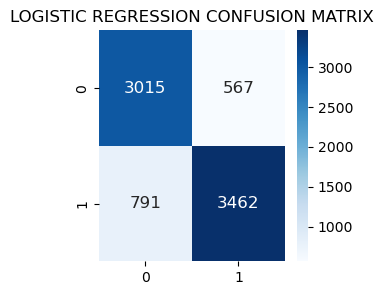

In [ ]:
plt.figure(figsize = (3,3))
plt.title('LOGISTIC REGRESSION CONFUSION MATRIX')
sns.heatmap(cm, annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12})

In [ ]:
accuracy_score(y_test, Predictions)

0.8266751754945756

In [ ]:
print(classification_report(y_test,Predictions, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      3582
           1       0.86      0.81      0.84      4253

    accuracy                           0.83      7835
   macro avg       0.83      0.83      0.83      7835
weighted avg       0.83      0.83      0.83      7835



In [ ]:
nb = MultinomialNB()
nb.fit(X_train_vectorized,y_train)

MultinomialNB()

In [ ]:
Predictions_nb = nb.predict(vect.transform(X_test))

In [ ]:
cm_nb = confusion_matrix(y_test, Predictions_nb)
cm_nb

array([[2050, 1532],
       [ 311, 3942]], dtype=int64)

<AxesSubplot:title={'center':'NAIVE_BAYES CONFUSION MATRIX'}>

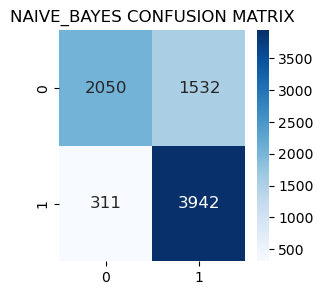

In [ ]:
plt.figure(figsize = (3,3))
plt.title('NAIVE_BAYES CONFUSION MATRIX')
sns.heatmap(cm_nb, annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12})

In [ ]:
accuracy_score(y_test, Predictions_nb)

0.7647734524569241

In [ ]:
print(classification_report(y_test,Predictions_nb, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.87      0.57      0.69      3582
           1       0.72      0.93      0.81      4253

    accuracy                           0.76      7835
   macro avg       0.79      0.75      0.75      7835
weighted avg       0.79      0.76      0.76      7835



In [ ]:
Rfc = RandomForestClassifier(max_depth = None,n_jobs = -1, n_estimators = 200)
Rfc.fit(X_train_vectorized,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [ ]:
Predictions_Rfc = Rfc.predict(vect.transform(X_test))
Predictions_Rfc

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [ ]:
Rfc_cm = confusion_matrix(y_test, Predictions_Rfc)
Rfc_cm

array([[2847,  735],
       [ 604, 3649]], dtype=int64)

<AxesSubplot:title={'center':'RANDOM FOREST CONFUSION MATRIX'}>

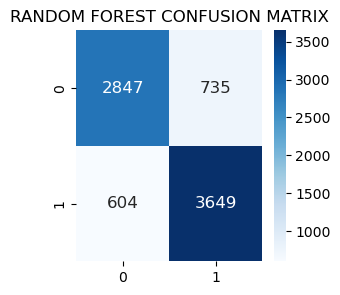

In [ ]:
plt.figure(figsize = (3,3))
plt.title('RANDOM FOREST CONFUSION MATRIX')
sns.heatmap(Rfc_cm, annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12})

In [ ]:
accuracy_score(y_test, Predictions_Rfc)

0.8291001914486279

In [ ]:
print(classification_report(y_test,Predictions_Rfc, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      3582
           1       0.83      0.86      0.84      4253

    accuracy                           0.83      7835
   macro avg       0.83      0.83      0.83      7835
weighted avg       0.83      0.83      0.83      7835



In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel = 'rbf', C = 250, gamma = 0.001)
svc.fit(X_train_vectorized,y_train)

SVC(C=250, gamma=0.001)

In [ ]:
Predictions_svc = svc.predict(vect.transform(X_test))
Predictions_svc

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [ ]:
svc_cm = confusion_matrix(y_test, Predictions_Rfc)
svc_cm

array([[2847,  735],
       [ 604, 3649]], dtype=int64)

<AxesSubplot:title={'center':'RANDOM FOREST CONFUSION MATRIX'}>

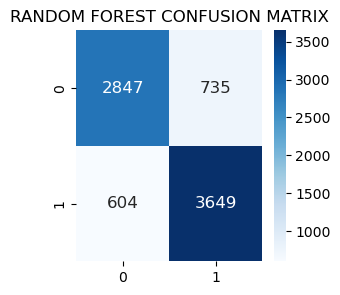

In [ ]:
plt.figure(figsize = (3,3))
plt.title('RANDOM FOREST CONFUSION MATRIX')
sns.heatmap(svc_cm, annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12})

In [ ]:
accuracy_score(y_test, Predictions_svc)

0.8307594128908743

In [ ]:
print(classification_report(y_test,Predictions_svc, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      3582
           1       0.87      0.81      0.84      4253

    accuracy                           0.83      7835
   macro avg       0.83      0.83      0.83      7835
weighted avg       0.83      0.83      0.83      7835



In [ ]:
X_test_df = X_test.to_frame()

In [ ]:
Prediction_log_reg = pd.DataFrame(Predictions)

In [ ]:
Res = pd.concat([X_test_df, Prediction_log_reg], axis=1, join="inner")
Res.head(15)

,review,0
3304,amazing game,1
3130,epuc gamer,0
6015,months release date game unable play stupid an...,0
3816,game great wont start times,1
16,recebasiuuu,0
4983,dog water game doesnt run,1
6581,shitty ass game dont work bro,1
3516,hit ball feels good,1
5227,im addict,0
7168,nice game,0


In [ ]:
Pred_nb = pd.DataFrame(Predictions_nb)

In [ ]:
Res_nb = pd.concat([X_test_df, Pred_nb], axis=1, join="inner")
Res_nb.head(20)

,review,0
3304,amazing game,1
3130,epuc gamer,0
6015,months release date game unable play stupid an...,0
3816,game great wont start times,1
16,recebasiuuu,1
4983,dog water game doesnt run,1
6581,shitty ass game dont work bro,1
3516,hit ball feels good,1
5227,im addict,0
7168,nice game,0


In [ ]:
Pred_rfc = pd.DataFrame(Predictions_Rfc)

In [ ]:
Res_rfc = pd.concat([X_test_df, Pred_rfc], axis=1, join="inner")
Res_rfc.head(15)

,review,0
3304,amazing game,1
3130,epuc gamer,0
6015,months release date game unable play stupid an...,0
3816,game great wont start times,1
16,recebasiuuu,0
4983,dog water game doesnt run,1
6581,shitty ass game dont work bro,0
3516,hit ball feels good,1
5227,im addict,0
7168,nice game,0


In [ ]:
Pred_svc = pd.DataFrame(Predictions_svc)

In [ ]:
Res_svc = pd.concat([X_test_df, Pred_svc], axis=1, join="inner")
Res_svc.head(20)

,review,0
3304,amazing game,1
3130,epuc gamer,0
6015,months release date game unable play stupid an...,0
3816,game great wont start times,1
16,recebasiuuu,0
4983,dog water game doesnt run,1
6581,shitty ass game dont work bro,1
3516,hit ball feels good,1
5227,im addict,0
7168,nice game,0
